In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
tau_m = 10.0            # 膜时间常数
dt = 1.0                # 时间步长
V = 0.0                 # 初始膜电位
V_th = 1.0              # 阈值
V_reset = 0.0           # 重置电位
time_steps = 200        # 时间步数
V_trace = []            # 记录膜电位随时间变化
spike_times = []        # 记录尖峰触发时间

t = np.arange(0, time_steps * dt, dt)
input_signal = 1.5 * np.sin(2 * np.pi * t / 50) + 0.5 * np.random.randn(len(t))
# 输入信号 一个周期为50毫秒 振幅为1.5的叠加了随机噪声的正弦信号

for i in range(time_steps):
    I_t = max(0, input_signal[i])
    V += (dt / tau_m) * (-V + I_t)
    if V >= V_th:
        spike_times.append(i)
        V_trace.append(V)
        V = V_reset
    else:
        V_trace.append(V)
    # 如果达到了阈值 记录尖峰时刻 重置膜电位

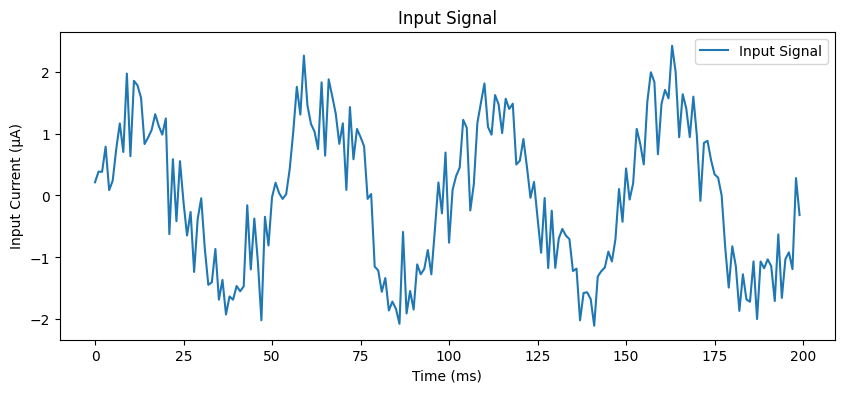

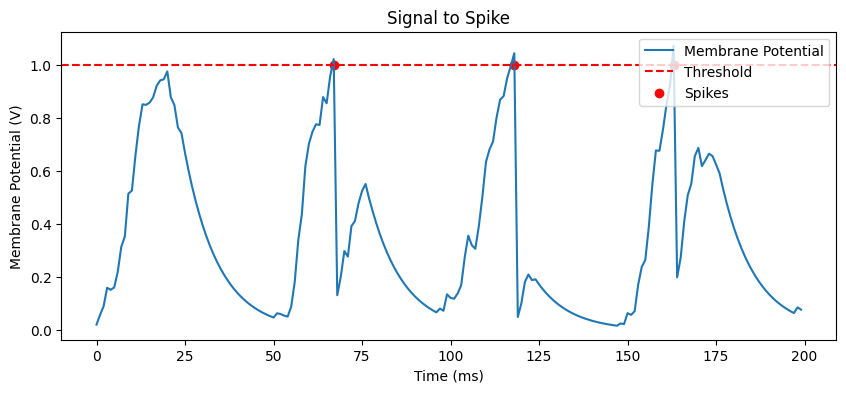

In [4]:
plt.figure(figsize=(10, 4))
plt.plot(t, input_signal, label="Input Signal")
plt.title("Input Signal")
plt.xlabel("Time (ms)")
plt.ylabel("Input Current (μA)")

plt.legend()
plt.show()

plt.figure(figsize=(10, 4))
plt.plot(t, V_trace, label="Membrane Potential")
plt.axhline(y=V_th, color='r', linestyle='--', label="Threshold")
plt.scatter(spike_times, [V_th] * len(spike_times), color='red', label="Spikes")
plt.title("Signal to Spike")
plt.xlabel("Time (ms)")
plt.ylabel("Membrane Potential (V)")

plt.legend()
plt.show()